In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from matplotlib import colors
from Jworkflow.electronic import Lobster_PProcess
import os
from Jworkflow.plot import plot_slab
from pymatgen.core import Structure

In [2]:
def Gradient_Graphics6(p1_axes,p2_x,p3_y,p4_edge=['k',3],p5_colormap=[(0,'r'),(1,'w')],p6_color_matrix=[[0],[1]],p7_close_patch=False,p8_alpha=1,p9_zorder=666):
    cmap=colors.LinearSegmentedColormap.from_list('Cmap',p5_colormap,N=256)
    x=list(p2_x);y=list(p3_y)
    if p7_close_patch:
        x.append(x[0])
        y.append(y[0])
    x=np.array(x)
    y=np.array(y)
    print(x.shape,y.shape)
    path=Path(np.array([x,y],dtype=object).transpose())
    patch=PathPatch(path,facecolor='none',edgecolor=p4_edge[0],lw=p4_edge[1],zorder=p9_zorder+1)
    p1_axes.add_patch(patch)
    p1_axes.imshow(p6_color_matrix,interpolation="bicubic",origin='lower',aspect="auto",clip_path=patch,clip_on=True,
              alpha=p8_alpha,cmap=cmap,extent=[min(p2_x),max(p2_x),min(p3_y),max(p3_y)],zorder=p9_zorder)


# Figure 6a

(5,) (5,)
(5,) (5,)
(5,) (5,)
(5,) (5,)
(5,) (5,)
(5,) (5,)


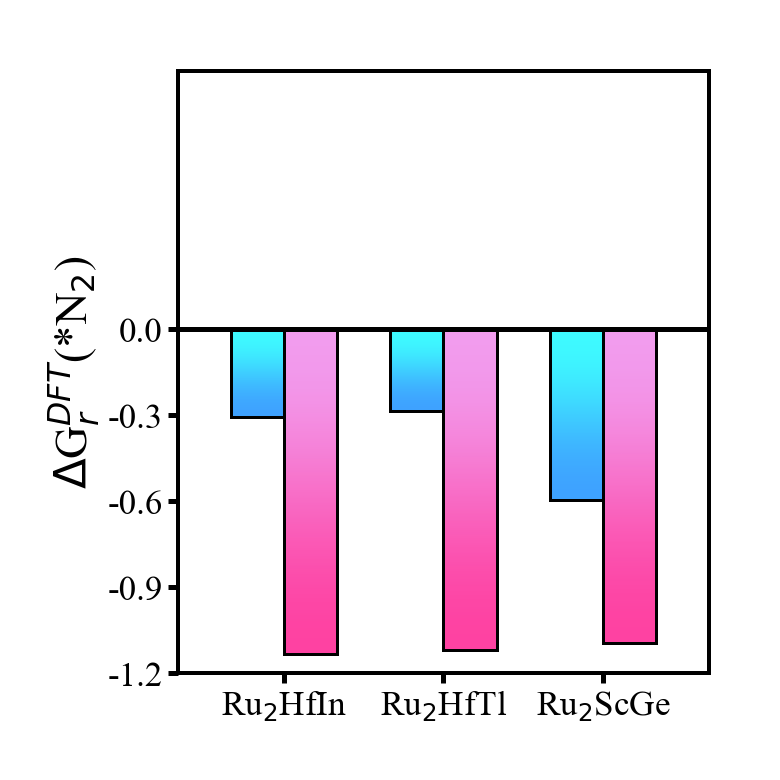

In [4]:
plt.rc('font',family='Times New Roman')
fig=plt.figure(figsize=(5/2.54,5/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

ax1=fig.add_axes([0.2,0.1,0.75,0.85])
ax1.tick_params(length=2,width=1,labelsize=7,pad=1)
ax1.set_ylabel('$\Delta$G$_r^{DFT}$(*N$_2$)',fontsize=9,labelpad=1)
ax1.set_xlim([0,10])
ax1.set_ylim([-1.2,0.9])
ax1.set_yticks([-1.2,-0.9,-0.6,-0.3,0.0])
ax1.set_yticklabels([-1.2,-0.9,-0.6,-0.3,0.0])
ax1.set_xticks([2,5,8])
ax1.set_xticklabels(['Ru$_2$HfIn','Ru$_2$HfTl','Ru$_2$ScGe'])

ax1.plot([0,10],[0,0],c='k',zorder=666,lw=1)

HfIn=[-0.30809326,-1.134204]
HfTl=[-0.28484786,-1.1205701]
ScGe=[-0.5958485,-1.0962936]

Gradient_Graphics6(ax1,[1,2,2,1],[0,0,HfIn[0],HfIn[0]],['k',0.6],[(0,'#0080ff'),(1,'aqua')],[[0],[1]],True,0.76,0)
Gradient_Graphics6(ax1,[2,3,3,2],[0,0,HfIn[1],HfIn[1]],['k',0.6],[(0,'#ff0080'),(1,'violet')],[[0],[1]],True,0.76,0)
Gradient_Graphics6(ax1,[4,5,5,4],[0,0,HfTl[0],HfTl[0]],['k',0.6],[(0,'#0080ff'),(1,'aqua')],[[0],[1]],True,0.76,0)
Gradient_Graphics6(ax1,[5,6,6,5],[0,0,HfTl[1],HfTl[1]],['k',0.6],[(0,'#ff0080'),(1,'violet')],[[0],[1]],True,0.76,0)
Gradient_Graphics6(ax1,[7,8,8,7],[0,0,ScGe[0],ScGe[0]],['k',0.6],[(0,'#0080ff'),(1,'aqua')],[[0],[1]],True,0.76,0)
Gradient_Graphics6(ax1,[8,9,9,8],[0,0,ScGe[1],ScGe[1]],['k',0.6],[(0,'#ff0080'),(1,'violet')],[[0],[1]],True,0.76,0)

# fig.savefig('Figure_6_a.tif',dpi=360)

# Figure 6d

In [10]:
file_path=r'DOS\N2h_0_1c'
cohpcar=r'COHPCAR.lobster'
coopcar=r'COOPCAR.lobster'
doscar=r'DOSCAR.lobster'
structure=r'Ru2HfIn_N2h_0_1c.vasp'

LPP=Lobster_PProcess()
LPP.read_car(os.path.join(file_path, cohpcar), os.path.join(file_path, structure))
LPP.read_car(os.path.join(file_path, doscar), os.path.join(file_path, structure),'dos')

LPP.show_bonds()

 1     44Ru-66N
 2     10Hf-66N
 3      65N-66N


In [11]:
cohp1=LPP.get_coxp(1) # Ru-N
cohp2=LPP.get_coxp(2) # Hf-N
cohp3=LPP.get_coxp(3) # N-N

In [12]:
dosN=LPP.get_dos(65,'p')
dosRu=LPP.get_dos(43,'d')
dosHf=LPP.get_dos(9,'d')

(402,) (402,)
(402,) (402,)
(402,) (402,)
(402,) (402,)
(402,) (402,)
(402,) (402,)


Text(0.345, 0.91, 'ICOHP=$-$0.34')

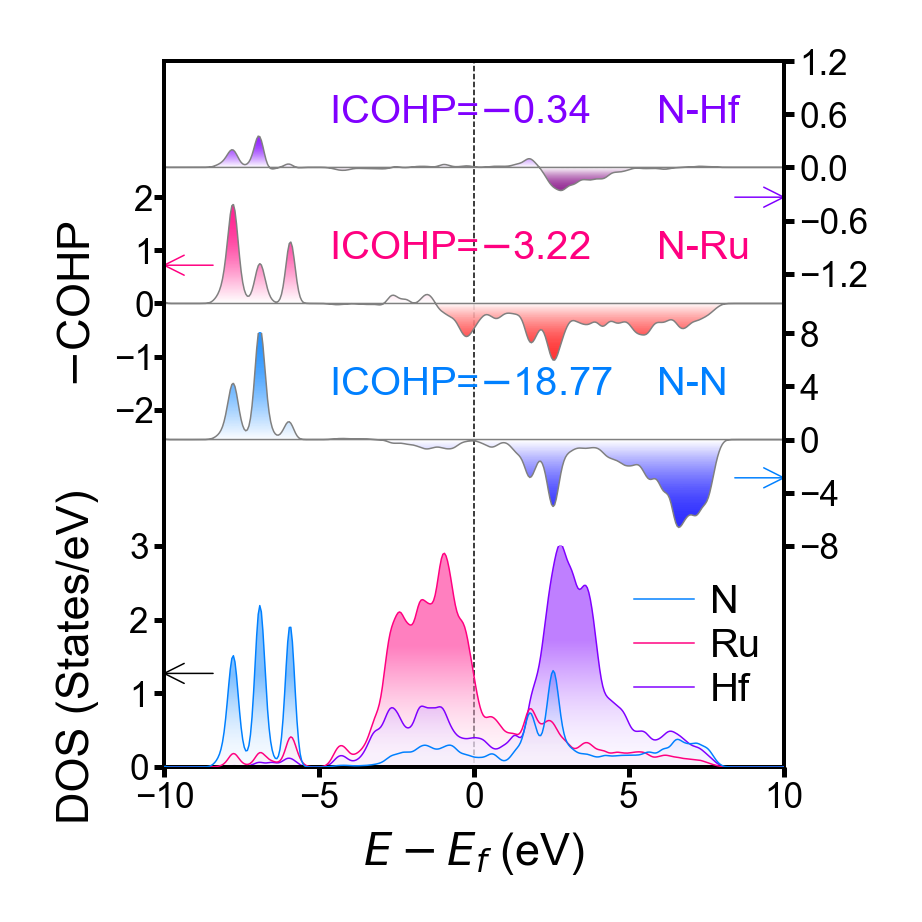

In [13]:
#N2h_0_1c__222
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(6/2.54,6/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)


ax1=fig.add_axes([0.15,0.14,0.73,0.26])
ax1.spines['top'].set_linewidth(0)
ax1.patch.set_alpha(0.0)
ax1.tick_params(length=2,width=1,labelsize=7,pad=1)
ax1.set_ylabel('DOS (States/eV)',fontsize=9,labelpad=6)
ax1.set_xlabel('$E-E_f$ (eV)',fontsize=9,labelpad=3)
ax1.set_ylim([0,3])
ax1.set_yticks([0,1,2,3])
ax1.plot(dosN['energies'],dosN['dos'],c='#0080ff',zorder=4,lw=0.3,label='N')
Gradient_Graphics6(ax1,dosN['energies'],dosN['dos'],['k',0],[(0,'w'),(0.6,'#0080ff'),(1,'#0080ff')],[[0],[1]],True,0.5,1)
ax1.plot(dosN['energies'],dosRu['dos'],c='#ff0080',zorder=3,lw=0.3,label='Ru')
Gradient_Graphics6(ax1,dosN['energies'],dosRu['dos'],['k',0],[(0,'w'),(0.6,'#ff0080'),(1,'#ff0080')],[[0],[1]],True,0.5,1)
ax1.plot(dosN['energies'],dosHf['dos'],c='#8000ff',zorder=2,lw=0.3,label='Hf')
Gradient_Graphics6(ax1,dosN['energies'],dosHf['dos'],['k',0],[(0,'w'),(0.6,'#8000ff'),(1,'#8000ff')],[[0],[1]],True,0.5,1)
ax1.legend(fontsize=8,bbox_to_anchor=[0.7,0.1,0.2,0.6],facecolor='none',edgecolor='none',labelspacing=0.2,handlelength=1.5,handletextpad=0.4)


ax2=fig.add_axes([0.15,0.40,0.73,0.25])
ax2.spines['top'].set_linewidth(0);ax2.spines['bottom'].set_linewidth(0)
ax2.patch.set_alpha(0.0)
ax2.tick_params(length=2,width=1,labelsize=7,pad=1)
ax2.yaxis.tick_right()
ax2.set_xticks([])

ax2.set_ylim([-8,8])
ax2.set_yticks([-8,-4,0,4,8])
Gradient_Graphics6(ax2,cohp3['energies'],-1*np.array(cohp3['COHP']['1']),['grey',0.3],[(0,'blue'),(0.4,'w'),(1,'#0080ff')],[[0],[1]],True,0.9,1)



ax3=fig.add_axes([0.15,0.56,0.73,0.25])
ax3.spines['top'].set_linewidth(0);ax3.spines['bottom'].set_linewidth(0)
ax3.patch.set_alpha(0.0)
ax3.tick_params(length=2,width=1,labelsize=7,pad=0)
ax3.set_xticks([])

ax3.set_ylim([-2,2])
ax3.set_yticks([-2,-1,0,1,2])
ax3.set_ylabel('$-$COHP',fontsize=9,labelpad=3)
Gradient_Graphics6(ax3,cohp1['energies'],-1*np.array(cohp1['COHP']['1']),['grey',0.3],[(0,'r'),(0.31,'w'),(1,'#ff0080')],[[0],[1]],True,0.9,1)



ax4=fig.add_axes([0.15,0.72,0.73,0.25])
ax4.spines['bottom'].set_linewidth(0)
ax4.patch.set_alpha(0.0)
ax4.tick_params(length=2,width=1,labelsize=7,pad=1)
ax4.yaxis.tick_right()
ax4.set_xticks([])

ax4.set_ylim([-1.2,1.2])
ax4.set_yticks([-1.2,-0.6,0,0.6,1.2])
Gradient_Graphics6(ax4,cohp2['energies'],-1*np.array(cohp2['COHP']['1']),['grey',0.3],[(0,'purple'),(0.4,'w'),(1,'#8000ff')],[[0],[1]],True,0.9,1)

ax0.annotate('',(0.22,0.25),(0.137,0.25),arrowprops=dict(arrowstyle='<-',color='k',lw=0.3))
ax0.annotate('',(0.81,0.48),(0.893,0.48),arrowprops=dict(arrowstyle='<-',color='#0080ff',lw=0.3))
ax0.annotate('',(0.22,0.73),(0.137,0.73),arrowprops=dict(arrowstyle='<-',color='#ff0080',lw=0.3))
ax0.annotate('',(0.81,0.81),(0.893,0.81),arrowprops=dict(arrowstyle='<-',color='#8000ff',lw=0.3))

ax0.plot([0.515,0.515],[0.145,0.97],zorder=0,lw=0.3,ls='--',c='k')

ax0.text(0.73,0.59,'N-N',fontsize=8,c='#0080ff',ha='left',va='center')
ax0.text(0.345,0.59,'ICOHP=$-$18.77',fontsize=8,c='#0080ff',ha='left',va='center')

ax0.text(0.73,0.75,'N-Ru',fontsize=8,c='#ff0080',ha='left',va='center')
ax0.text(0.345,0.75,'ICOHP=$-$3.22',fontsize=8,c='#ff0080',ha='left',va='center')

ax0.text(0.73,0.91,'N-Hf',fontsize=8,c='#8000ff',ha='left',va='center')
ax0.text(0.345,0.91,'ICOHP=$-$0.34',fontsize=8,c='#8000ff',ha='left',va='center')

# fig.savefig('Figure_6_d.tif',dpi=360)

# Figure 6e

In [14]:
file_path=r'DOS\N2h_90_1c'
cohpcar=r'COHPCAR.lobster'
coopcar=r'COOPCAR.lobster'
doscar=r'DOSCAR.lobster'
structure=r'Ru2HfIn_N2h_90_1c.vasp'

LPP=Lobster_PProcess()
LPP.read_car(os.path.join(file_path, cohpcar), os.path.join(file_path, structure))
LPP.read_car(os.path.join(file_path, doscar), os.path.join(file_path, structure),'dos')

LPP.show_bonds()

 1     44Ru-65N
 2     10Hf-65N
 3      65N-66N


In [15]:
cohp1=LPP.get_coxp(1) # Ru-N
cohp2=LPP.get_coxp(2) # Hf-N
cohp3=LPP.get_coxp(3) # N-N

In [16]:
dosN=LPP.get_dos(65,'p')
dosRu=LPP.get_dos(43,'d')
dosHf=LPP.get_dos(9,'d')

(402,) (402,)
(402,) (402,)
(402,) (402,)
(402,) (402,)
(402,) (402,)
(402,) (402,)


Text(0.345, 0.91, 'ICOHP=$-$3.32')

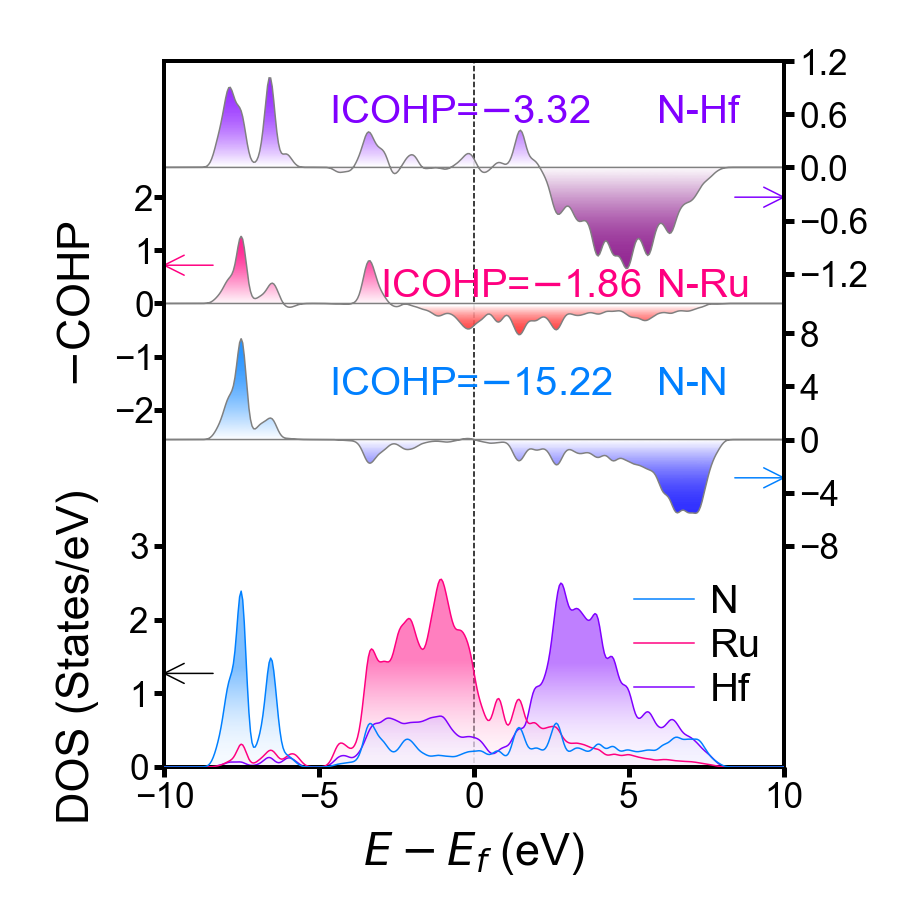

In [17]:
#N2h_90_1c_22
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(6/2.54,6/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)


ax1=fig.add_axes([0.15,0.14,0.73,0.26])
ax1.spines['top'].set_linewidth(0)
ax1.patch.set_alpha(0.0)
ax1.tick_params(length=2,width=1,labelsize=7,pad=1)
ax1.set_ylabel('DOS (States/eV)',fontsize=9,labelpad=6)
ax1.set_xlabel('$E-E_f$ (eV)',fontsize=9,labelpad=3)
ax1.set_ylim([0,3])
ax1.set_yticks([0,1,2,3])
ax1.plot(dosN['energies'],dosN['dos'],c='#0080ff',zorder=4,lw=0.3,label='N')
Gradient_Graphics6(ax1,dosN['energies'],dosN['dos'],['k',0],[(0,'w'),(0.6,'#0080ff'),(1,'#0080ff')],[[0],[1]],True,0.5,1)
ax1.plot(dosN['energies'],dosRu['dos'],c='#ff0080',zorder=3,lw=0.3,label='Ru')
Gradient_Graphics6(ax1,dosN['energies'],dosRu['dos'],['k',0],[(0,'w'),(0.6,'#ff0080'),(1,'#ff0080')],[[0],[1]],True,0.5,1)
ax1.plot(dosN['energies'],dosHf['dos'],c='#8000ff',zorder=2,lw=0.3,label='Hf')
Gradient_Graphics6(ax1,dosN['energies'],dosHf['dos'],['k',0],[(0,'w'),(0.6,'#8000ff'),(1,'#8000ff')],[[0],[1]],True,0.5,1)
ax1.legend(fontsize=8,bbox_to_anchor=[0.7,0.1,0.2,0.6],facecolor='none',edgecolor='none',labelspacing=0.2,handlelength=1.5,handletextpad=0.4)


ax2=fig.add_axes([0.15,0.40,0.73,0.25])
ax2.spines['top'].set_linewidth(0);ax2.spines['bottom'].set_linewidth(0)
ax2.patch.set_alpha(0.0)
ax2.tick_params(length=2,width=1,labelsize=7,pad=1)
ax2.yaxis.tick_right()
ax2.set_xticks([])

ax2.set_ylim([-8,8])
ax2.set_yticks([-8,-4,0,4,8])
Gradient_Graphics6(ax2,cohp3['energies'],-1*np.array(cohp3['COHP']['1']),['grey',0.3],[(0,'blue'),(0.38,'w'),(1,'#0080ff')],[[0],[1]],True,0.9,1)



ax3=fig.add_axes([0.15,0.56,0.73,0.25])
ax3.spines['top'].set_linewidth(0);ax3.spines['bottom'].set_linewidth(0)
ax3.patch.set_alpha(0.0)
ax3.tick_params(length=2,width=1,labelsize=7,pad=0)
ax3.set_xticks([])

ax3.set_ylim([-2,2])
ax3.set_yticks([-2,-1,0,1,2])
ax3.set_ylabel('$-$COHP',fontsize=9,labelpad=3)
Gradient_Graphics6(ax3,cohp1['energies'],-1*np.array(cohp1['COHP']['1']),['grey',0.3],[(0,'r'),(0.22,'w'),(1,'#ff0080')],[[0],[1]],True,0.9,1)



ax4=fig.add_axes([0.15,0.72,0.73,0.25])
ax4.spines['bottom'].set_linewidth(0)
ax4.patch.set_alpha(0.0)
ax4.tick_params(length=2,width=1,labelsize=7,pad=1)
ax4.yaxis.tick_right()
ax4.set_xticks([])

ax4.set_ylim([-1.2,1.2])
ax4.set_yticks([-1.2,-0.6,0,0.6,1.2])
Gradient_Graphics6(ax4,cohp2['energies'],-1*np.array(cohp2['COHP']['1']),['grey',0.3],[(0,'purple'),(0.55,'w'),(1,'#8000ff')],[[0],[1]],True,0.9,1)

ax0.annotate('',(0.22,0.25),(0.137,0.25),arrowprops=dict(arrowstyle='<-',color='k',lw=0.3))
ax0.annotate('',(0.81,0.48),(0.893,0.48),arrowprops=dict(arrowstyle='<-',color='#0080ff',lw=0.3))
ax0.annotate('',(0.22,0.73),(0.137,0.73),arrowprops=dict(arrowstyle='<-',color='#ff0080',lw=0.3))
ax0.annotate('',(0.81,0.81),(0.893,0.81),arrowprops=dict(arrowstyle='<-',color='#8000ff',lw=0.3))

ax0.plot([0.515,0.515],[0.145,0.97],zorder=0,lw=0.3,ls='--',c='k')

ax0.text(0.73,0.59,'N-N',fontsize=8,c='#0080ff',ha='left',va='center')
ax0.text(0.345,0.59,'ICOHP=$-$15.22',fontsize=8,c='#0080ff',ha='left',va='center')

ax0.text(0.73,0.705,'N-Ru',fontsize=8,c='#ff0080',ha='left',va='center',zorder=9)
ax0.text(0.405,0.705,'ICOHP=$-$1.86',fontsize=8,c='#ff0080',ha='left',va='center',zorder=9)

ax0.text(0.73,0.91,'N-Hf',fontsize=8,c='#8000ff',ha='left',va='center')
ax0.text(0.345,0.91,'ICOHP=$-$3.32',fontsize=8,c='#8000ff',ha='left',va='center')

# fig.savefig('Figure_6_e.tif',dpi=360)

# Figure 6f

Text(-0.3, 3.3, '$\\pi^*_{2p}$')

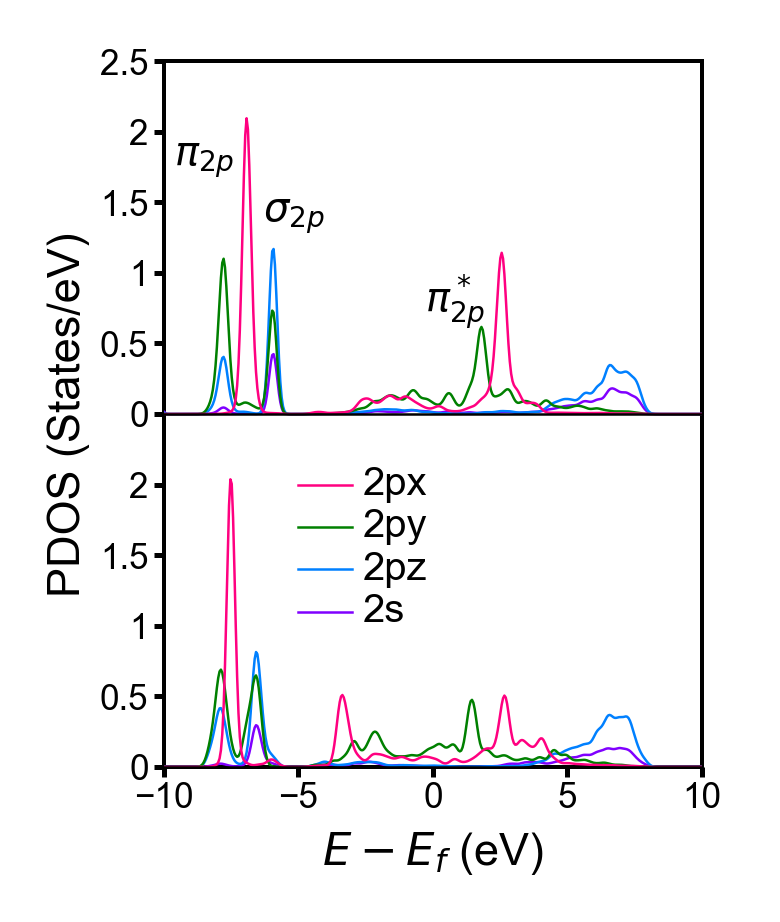

In [18]:
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(5/2.54,6/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

ax1=fig.add_axes([0.18,0.14,0.76,0.83])
ax1.tick_params(length=2,width=1,labelsize=7,pad=1)
ax1.set_ylabel('PDOS (States/eV)',fontsize=9,labelpad=2)
ax1.set_xlabel('$E-E_f$ (eV)',fontsize=9,labelpad=3)
ax1.set_xlim([-10,10])
ax1.set_ylim([0,5])
ax1.plot([-10,10],[2.5,2.5],lw=0.5,c='k',zorder=100)
ax1.plot([-10,10],[0,0],lw=0.5,c='k',zorder=100)
ax1.set_yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
ax1.set_yticklabels([0,0.5,1,1.5,2,0,0.5,1,1.5,2,2.5])

lw=0.5
cx='#ff0080'
cy='#008000'
cz='#0080ff'
cs='#8000ff'

file_path=r'DOS\N2h_90_1c'
structure=r'Ru2HfIn_N2h_90_1c.vasp'
LPP=Lobster_PProcess()
LPP.read_car(os.path.join(file_path, cohpcar), os.path.join(file_path, structure))
LPP.read_car(os.path.join(file_path, doscar), os.path.join(file_path, structure),'dos')
dosNx=LPP.get_dos(65,['2p_x'])
dosNy=LPP.get_dos(65,['2p_y'])
dosNz=LPP.get_dos(65,['2p_z'])
dosNs=LPP.get_dos(65,['2s'])
ax1.plot(dosNx['energies'],dosNx['dos'],c=cz,lw=lw,zorder=7)
ax1.plot(dosNx['energies'],dosNy['dos'],c=cx,lw=lw,zorder=9)
ax1.plot(dosNx['energies'],dosNz['dos'],c=cy,lw=lw,zorder=8)
ax1.plot(dosNx['energies'],dosNs['dos'],c=cs,lw=lw,zorder=6)

file_path=r'DOS\N2h_0_1c'
structure=r'Ru2HfIn_N2h_0_1c.vasp'
LPP=Lobster_PProcess()
LPP.read_car(os.path.join(file_path, cohpcar), os.path.join(file_path, structure))
LPP.read_car(os.path.join(file_path, doscar), os.path.join(file_path, structure),'dos')
dosNx=LPP.get_dos(65,['2p_x'])
dosNy=LPP.get_dos(65,['2p_y'])
dosNz=LPP.get_dos(65,['2p_z'])
dosNs=LPP.get_dos(65,['2s'])
ax1.plot(dosNx['energies'],dosNx['dos']+2.5,c=cx,lw=lw,zorder=9)
ax1.plot(dosNx['energies'],dosNy['dos']+2.5,c=cz,lw=lw,zorder=7)
ax1.plot(dosNx['energies'],dosNz['dos']+2.5,c=cy,lw=lw,zorder=8)
ax1.plot(dosNx['energies'],dosNs['dos']+2.5,c=cs,lw=lw,zorder=6)

ax1.plot([-5,-3],[2,2],lw=lw,c=cx);ax1.text(-2.6,2,'2px',fontsize=8,ha='left',va='center')
ax1.plot([-5,-3],[1.7,1.7],lw=lw,c=cy);ax1.text(-2.6,1.7,'2py',fontsize=8,ha='left',va='center')
ax1.plot([-5,-3],[1.4,1.4],lw=lw,c=cz);ax1.text(-2.6,1.4,'2pz',fontsize=8,ha='left',va='center')
ax1.plot([-5,-3],[1.1,1.1],lw=lw,c=cs);ax1.text(-2.6,1.1,'2s',fontsize=8,ha='left',va='center')

ax1.text(-6.3,3.9,'$\sigma_{2p}$',fontsize=8,ha='left',va='center')
ax1.text(-9.6,4.3,'$\pi_{2p}$',fontsize=8,ha='left',va='center')
ax1.text(-0.3,3.3,'$\pi^*_{2p}$',fontsize=8,ha='left',va='center')

# fig.savefig('Figure_6_f.tif',dpi=360)

# Figure 6g

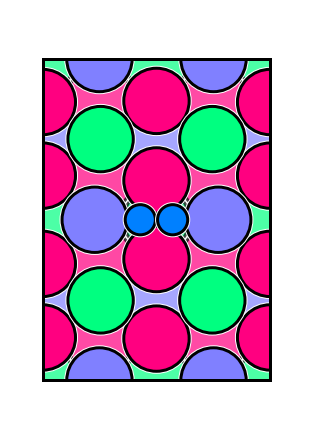

In [29]:
s=Structure.from_file(r'Ru2HfIn_adss\Ru2HfIn_N2h_90_1c.vasp')

plt.rc('font',family='Arial')
fig=plt.figure(figsize=(1.7/2.54,2.6/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

X='Ru'
Y='Hf'
Z='In'
plot_slab(ax0,s,max_z_cart=13.5,axis_extend=1.06,atom_edge_para=['k',0.6],cell_edge_para=['k','-',0.6,1],
         color_dict={X:'#ff0080',Y:'#8080ff',Z:'#00ff80','N':'#0080ff','H':'#ffff80'},
         radius_dict={X:1.3,Y:1.3,Z:1.3,'N':0.6,'H':0.3},)

# fig.savefig('Figure_6_g_N2.tif',dpi=360)

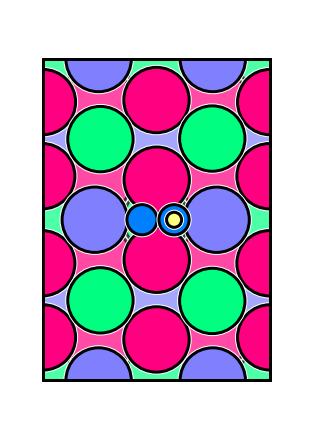

In [30]:
s=Structure.from_file(r'Ru2HfIn_adss\Ru2HfIn_NNHv_0_1h.vasp')

plt.rc('font',family='Arial')
fig=plt.figure(figsize=(1.7/2.54,2.6/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

X='Ru'
Y='Hf'
Z='In'
plot_slab(ax0,s,max_z_cart=13.5,axis_extend=1.06,atom_edge_para=['k',0.6],cell_edge_para=['k','-',0.6,1],
         color_dict={X:'#ff0080',Y:'#8080ff',Z:'#00ff80','N':'#0080ff','H':'#ffff80'},
         radius_dict={X:1.3,Y:1.3,Z:1.3,'N':0.6,'H':0.3},)

# fig.savefig('Figure_6_g_NNH.tif',dpi=360)

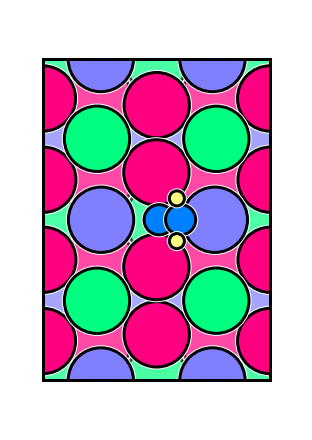

In [31]:
s=Structure.from_file(r'Ru2HfIn_adss\Ru2HfIn_NNH2h_90_0b.vasp')

plt.rc('font',family='Arial')
fig=plt.figure(figsize=(1.7/2.54,2.6/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

X='Ru'
Y='Hf'
Z='In'
plot_slab(ax0,s,max_z_cart=13.5,axis_extend=1.06,atom_edge_para=['k',0.6],cell_edge_para=['k','-',0.6,1],
         color_dict={X:'#ff0080',Y:'#8080ff',Z:'#00ff80','N':'#0080ff','H':'#ffff80'},
         radius_dict={X:1.3,Y:1.3,Z:1.3,'N':0.6,'H':0.3},)

# fig.savefig('Figure_6_g_NNH2.tif',dpi=360)

# Figure 6h

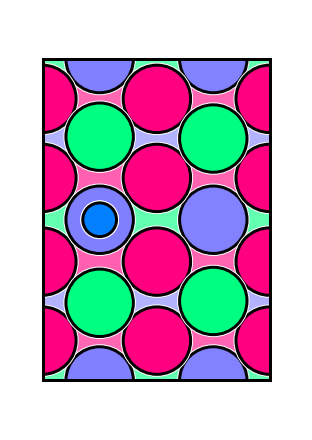

In [24]:
s=Structure.from_file(r'Cu2NiGa_adss\Cu2NiGa_N2v_0_2t.vasp')

plt.rc('font',family='Arial')
fig=plt.figure(figsize=(1.7/2.54,2.6/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

X='Cu'
Y='Ni'
Z='Ga'
plot_slab(ax0,s,max_z_cart=13.5,axis_extend=1.06,atom_edge_para=['k',0.6],cell_edge_para=['k','-',0.6,1],
         color_dict={X:'#ff0080',Y:'#8080ff',Z:'#00ff80','N':'#0080ff','H':'#ffff80'},
         radius_dict={X:1.2,Y:1.2,Z:1.2,'N':0.6,'H':0.3},)

# fig.savefig('Figure_6_h_N2.tif',dpi=360)

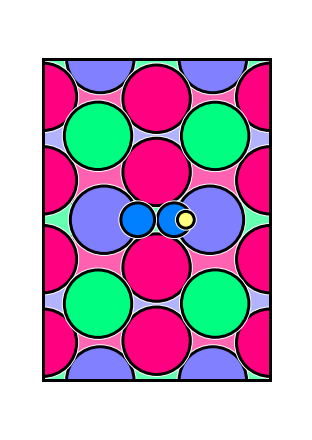

In [25]:
s=Structure.from_file(r'Cu2NiGa_adss\Cu2NiGa_NNHh_90_0b.vasp')

plt.rc('font',family='Arial')
fig=plt.figure(figsize=(1.7/2.54,2.6/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

X='Cu'
Y='Ni'
Z='Ga'
plot_slab(ax0,s,max_z_cart=13.5,axis_extend=1.06,atom_edge_para=['k',0.6],cell_edge_para=['k','-',0.6,1],
         color_dict={X:'#ff0080',Y:'#8080ff',Z:'#00ff80','N':'#0080ff','H':'#ffff80'},
         radius_dict={X:1.2,Y:1.2,Z:1.2,'N':0.6,'H':0.3},)

# fig.savefig('Figure_6_h_NNH.tif',dpi=360)

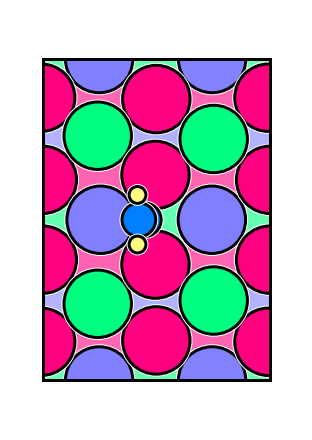

In [27]:
s=Structure.from_file(r'Cu2NiGa_adss\Cu2NiGa_NNH2v_0_0h.vasp')

plt.rc('font',family='Arial')
fig=plt.figure(figsize=(1.7/2.54,2.6/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

X='Cu'
Y='Ni'
Z='Ga'
plot_slab(ax0,s,max_z_cart=13.5,axis_extend=1.06,atom_edge_para=['k',0.6],cell_edge_para=['k','-',0.6,1],
         color_dict={X:'#ff0080',Y:'#8080ff',Z:'#00ff80','N':'#0080ff','H':'#ffff80'},
         radius_dict={X:1.2,Y:1.2,Z:1.2,'N':0.6,'H':0.3},)

# fig.savefig('Figure_6_h_NNH2.tif',dpi=360)